# Python3实现单目标粒子群算法（PSO）

1) 初始化粒子群。随机设置各粒子的位置和速度，默认粒子的初始位置为粒子最优位置，并根据所有粒子最优位置，选取群体最优位置。
2) 判断是否达到迭代次数；若没有达到，则跳转到步骤3）。否则，直接输出结果。
3) 更新所有粒子的位置和速度；
4) 计算各粒子的适应度值。将粒子当前位置的适应度值与粒子最优位置的适应度值进行比较，决定是否更新粒子最优位置；将所有粒子最优位置的适应度值与群体最优位置的适应度值进行比较，决定是否更新群体最优位置。然后，跳转到步骤2）。


In [ ]:
# Import libs
import numpy as np
import random as rd
import matplotlib.pyplot as plt

In [2]:
# Constant definition

# Minimum position of the particle
MIN_POS = [-5,-5]
# Maximum position of the particle
MAX_POS = [5,5]
# Minimum speed of the particle
MIN_SPD = [-0.5,-0.5]
# Maximum speed of the particle
MAX_SPD = [1,1]

C1_MIN = 0
C1_MAX = 1.5
C2_MIN = 0
C2_MAX = 1.5
W_MAX = 1.4
W_MIN = 0

In [11]:
# Class definition
class PSO():
    
    """
        PSO class
    """

    def __init__(self,iters=100,pcount=50,pdim=2,mode='min'):
        
        """
            PSO initialization
            ------------------
        """
        
        # Inertia factor
        self.w = None
        # Learning factor
        self.c1 = None
        # Learning factor
        self.c2 = None
        
        # Number of iterations
        self.iters = iters
        # Number of particles
        self.pcount = pcount
        # Particle dimension
        self.pdim = pdim
        # Group optimal position
        self.gbpos = np.array([0.0]*pdim)
        
        # The mode of PSO
        self.mode = mode
        
        # Current position of the particle
        self.cur_pos = np.zeros((pcount,pdim))
        # Current speed of the particle
        self.cur_spd = np.zeros((pcount,pdim))
        # The optimal position of the particle
        self.bpos = np.zeros((pcount,pdim))
        
        # Record the function value of the optimal solution
        self.trace = []
        
    def init_particles(self):
        
        """
            init_particles function
            -----------------------
        """
        
        # Generating particle swarm
        for i in range(self.pcount):
            for j in range(self.pdim):
                # uniform随机分布的实数
                self.cur_pos[i,j] = rd.uniform(MIN_POS[j], MAX_POS[j])
                self.cur_spd[i,j] = rd.uniform(MIN_SPD[j], MAX_SPD[j])
                self.bpos[i,j] = self.cur_pos[i,j]
        
        # Initial group optimal position
        for i in range(self.pcount):
            if self.mode == 'min':
                if self.fitness(self.cur_pos[i]) < self.fitness(self.gbpos):
                    self.gbpos = self.cur_pos[i]
            elif self.mode == 'max':
                if self.fitness(self.cur_pos[i]) > self.fitness(self.gbpos):
                    self.gbpos = self.cur_pos[i]
        
    def fitness(self, x):
        
        """
            fitness function
            ----------------
            Parameter:
                x : 
        """
      
        # Objective function    
        fitval = 5 * np.cos(x[0] * x[1]) + x[0] * x[1] + x[1]**3
        # Return value
        return fitval
    
    def adaptive(self,t,p,c1,c2,w):
        if t == 0:
            c1 = 0
            c2 = 0
            w = 0.95
        else:
            if self.mode == 'min':
                # c1
                if self.fitness(self.cur_pos[p]) > self.fitness(self.bpos[p]):
                    c1 = C1_MIN + (t/self.iters) * C1_MAX + rd.uniform(0,0.1)
                elif self.fitness(self.cur_pos[p]) <= self.fitness(self.bpos[p]):
                    c1 = c1
                # c2 
                if self.fitness(self.bpos[p]) > self.fitness(self.gbpos):
                    c2 = C2_MIN + (t/self.iters) * C2_MAX + rd.uniform(0,0.1)
                elif self.fitness(self.bpos[p]) <= self.fitness(self.gbpos):
                    c2 = c2
                # w
                w = W_MAX - (W_MAX - W_MIN)*(t/self.iters)
            elif self.mode == 'max':
                pass
            
        return c1, c2, w
    
    def update(self,t):
        
        """
            update function
            ---------------
                Note that :
                    1. Update particle position
                    2. Update particle speed
                    3. Update particle optimal position
                    4. Update group optimal position
        """
        
        # Part1 : Traverse the particle swarm
        for i in range(self.pcount):
            # Dynamic parameters
            self.c1, self.c2, self.w = self.adaptive(t,i,self.c1,self.c2,self.w)
            
            # Calculate the speed after particle iteration
            # Update particle speed
            self.cur_spd[i] = self.w * self.cur_spd[i] +self.c1*rd.uniform(0,1)*(self.bpos[i]-self.cur_pos[i]) +self.c2*rd.uniform(0,1)*(self.gbpos - self.cur_pos[i])
            
            for n in range(self.pdim):
                if self.cur_spd[i,n] > MAX_SPD[n]:
                    self.cur_spd[i,n] = MAX_SPD[n]
                elif self.cur_spd[i,n] < MIN_SPD[n]:
                    self.cur_spd[i,n] = MIN_SPD[n]
            
            # Calculate the position after particle iteration
            # Update particle position
            self.cur_pos[i] = self.cur_pos[i] + self.cur_spd[i]
            for n in range(self.pdim):
                if self.cur_pos[i,n] > MAX_POS[n]:
                    self.cur_pos[i,n] = MAX_POS[n]
                elif self.cur_pos[i,n] < MIN_POS[n]:
                    self.cur_pos[i,n] = MIN_POS[n]
        
        # Part2 : Update particle optimal position
        for k in range(self.pcount):
            if self.mode == 'min':
                if self.fitness(self.cur_pos[k]) < self.fitness(self.bpos[k]):
                    self.bpos[k] = self.cur_pos[k]
            elif self.mode == 'max':
                if self.fitness(self.cur_pos[k]) > self.fitness(self.bpos[k]):
                    self.bpos[k] = self.cur_pos[k]
        
        # Part3 : Update group optimal position
        for k in range(self.pcount):
            if self.mode == 'min':
                if self.fitness(self.bpos[k]) < self.fitness(self.gbpos):
                    self.gbpos = self.bpos[k]
            elif self.mode == 'max':
                if self.fitness(self.bpos[k]) > self.fitness(self.gbpos):
                    self.gbpos = self.bpos[k]
                    
    def run(self):
        
        """
            run function
            -------------
        """

        # Initialize the particle swarm
        self.init_particles()
        
        for t in range(self.iters):
            # Update all particle information
            self.update(t)
            
            # Record the fitness value of global optimal position
            self.trace.append(self.fitness(self.gbpos))

= Optimal solution:
=   x= 4.438501296124188
=   y= -5.0
= Function value:
=   f(x,y)= -152.09148598148525


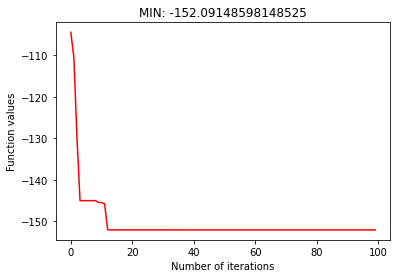

= Press any key to exit... i


In [12]:
def main():
    
    for i in range(1):
        pso = PSO(iters=100,pcount=50,pdim=2, mode='min')
        pso.run()
            
        #
        print('='*40)
        print('= Optimal solution:')
        print('=   x=', pso.gbpos[0])
        print('=   y=', pso.gbpos[1])
        print('= Function value:')
        print('=   f(x,y)=', pso.fitness(pso.gbpos))
        #print(pso.w)
        print('='*40)
        
        #
        plt.plot(pso.trace, 'r')
        title = 'MIN: ' + str(pso.fitness(pso.gbpos))
        plt.title(title)
        plt.xlabel("Number of iterations")
        plt.ylabel("Function values")
        plt.show()
        
    input('= Press any key to exit...')
    print('='*40)
    exit() 
 
 
if __name__ == "__main__":
    main()